In [1]:
import numpy as np 
import pandas as pd 
import datetime
from datetime import datetime
from tqdm import tqdm_notebook as tqdm

from multiprocessing import Pool, TimeoutError, Lock, Value, current_process, cpu_count
from functools import partial
import Feature_function as func

In [2]:
data = pd.read_csv('D:\\庫存健診開發\\data\\Stock\\TWSE_Stock.csv', converters={'ts': str, 'StockName': str, 'StockNo': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,StockName,StockNo,close,high,low,open,return,total,ts,vol,On_Date
0,台泥,1101,19.3,19.9,19.1,19.9,NaN,8.756613e+08,2004-02-11,44990547.0,1962-02-09
1,台泥,1101,18.7,19.6,18.4,19.4,-0.6,7.295642e+08,2004-02-12,38283630.0,1962-02-09
2,台泥,1101,20.0,20.0,18.9,19.0,1.3,1.200960e+09,2004-02-13,60809947.0,1962-02-09
3,台泥,1101,21.0,21.4,20.0,20.0,1.0,3.204683e+09,2004-02-16,154068407.0,1962-02-09
4,台泥,1101,21.0,21.3,20.4,21.0,0.0,1.477319e+09,2004-02-17,70709589.0,1962-02-09
...,...,...,...,...,...,...,...,...,...,...,...
2874548,世紀鋼,9958,77.3,78.9,77.1,78.9,-0.2,2.371908e+08,2019-09-17,3050500.0,2008-03-12 00:00:00
2874549,世紀鋼,9958,77.7,79.3,77.5,77.9,0.4,4.648791e+08,2019-09-18,5940537.0,2008-03-12 00:00:00
2874550,世紀鋼,9958,76.3,78.4,76.2,78.4,-1.4,3.086962e+08,2019-09-19,4011923.0,2008-03-12 00:00:00
2874551,世紀鋼,9958,75.8,77.0,75.8,76.6,-0.5,1.328813e+08,2019-09-20,1742684.0,2008-03-12 00:00:00


In [3]:
year_list = data["ts"].dt.year.unique().tolist()
month_list = data["ts"].dt.month.unique().tolist()
month_dict = {}
for y in year_list:
    month_dict[y] = {}
    for m in month_list:
        d = data[(data["ts"].dt.year == y) & (data["ts"].dt.month == m)]["ts"].dt.date.unique().tolist()
        month_dict[y][m] = {}
        for i, date in enumerate(d):
            month_dict[y][m][date] = i

In [4]:
df_list = [group[1] for group in data.groupby(data['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_time_feature, month_dict=month_dict), df_list), total=len(df_list)), 1):
            output_list.append(x)
                
df = pd.concat(output_list, axis=0)
df

,StockName,StockNo,close,high,low,open,return,total,ts,vol,On_Date,Month,Weekday,Intramonth,IntramonthPeriod,WeekNum
0,亞泥,1102,22.40,23.00,21.90,23.00,NaN,1.895267e+08,2004-02-11,8444006.0,1962-06-08,2,3,0.000000,1,0.50
1,亞泥,1102,21.90,22.50,21.30,22.30,-0.50,2.468034e+08,2004-02-12,11195882.0,1962-06-08,2,4,0.083333,1,0.50
2,亞泥,1102,23.30,23.30,21.50,21.50,1.40,8.446286e+08,2004-02-13,37115038.0,1962-06-08,2,5,0.166667,1,0.50
3,亞泥,1102,23.70,24.70,23.00,23.30,0.40,1.132873e+09,2004-02-16,47586534.0,1962-06-08,2,1,0.250000,2,0.75
4,亞泥,1102,24.50,24.50,23.50,23.80,0.80,6.549583e+08,2004-02-17,27383235.0,1962-06-08,2,2,0.333333,2,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,潤泰新,9945,43.45,43.50,43.25,43.50,0.00,4.273570e+07,2019-09-17,985192.0,1992-04-30,9,2,0.714286,4,0.60
3862,潤泰新,9945,43.15,43.30,42.80,43.20,-0.30,6.837791e+07,2019-09-18,1586795.0,1992-04-30,9,3,0.785714,4,0.60
3863,潤泰新,9945,42.60,43.25,42.55,43.20,-0.55,5.453982e+07,2019-09-19,1274272.0,1992-04-30,9,4,0.857143,5,0.60
3864,潤泰新,9945,42.10,42.60,42.10,42.60,-0.50,1.163660e+08,2019-09-20,2752245.0,1992-04-30,9,5,0.928571,5,0.60


In [5]:
df = func.categorical_transform(df)
df

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and

,StockName,StockNo,close,high,low,open,return,total,ts,vol,...,Tue,Wed,Thu,Fri,Sat,First,Second,Third,Fourth,Fifth
0,亞泥,1102,22.40,23.00,21.90,23.00,NaN,1.895267e+08,2004-02-11,8444006.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,亞泥,1102,21.90,22.50,21.30,22.30,-0.50,2.468034e+08,2004-02-12,11195882.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,亞泥,1102,23.30,23.30,21.50,21.50,1.40,8.446286e+08,2004-02-13,37115038.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,亞泥,1102,23.70,24.70,23.00,23.30,0.40,1.132873e+09,2004-02-16,47586534.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,亞泥,1102,24.50,24.50,23.50,23.80,0.80,6.549583e+08,2004-02-17,27383235.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874548,潤泰新,9945,43.45,43.50,43.25,43.50,0.00,4.273570e+07,2019-09-17,985192.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2874549,潤泰新,9945,43.15,43.30,42.80,43.20,-0.30,6.837791e+07,2019-09-18,1586795.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2874550,潤泰新,9945,42.60,43.25,42.55,43.20,-0.55,5.453982e+07,2019-09-19,1274272.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2874551,潤泰新,9945,42.10,42.60,42.10,42.60,-0.50,1.163660e+08,2019-09-20,2752245.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df_list = [group[1] for group in df.groupby(df['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(func.get_technical_indicators, df_list), total=len(df_list)), 1):
            output_list.append(x)
                
df = pd.concat(output_list, axis=0)
df

,StockName,StockNo,close,high,low,open,return,total,ts,vol,...,MACD,upper_band,lower_band,TR,ATR,RSI_15,SO%k5,SO%d3,VWAP,denoised_close
0,台泥,1101,19.30,19.90,19.10,19.90,NaN,8.756613e+08,2004-02-11,44990547.0,...,NaN,NaN,NaN,0.80,0.800000,0.000000,0.000000,0.000000,19.463229,20.039051
1,台泥,1101,18.70,19.60,18.40,19.40,-0.60,7.295642e+08,2004-02-12,38283630.0,...,NaN,NaN,NaN,1.20,1.013333,0.000000,0.000000,0.000000,19.056819,20.040495
2,台泥,1101,20.00,20.00,18.90,19.00,1.30,1.200960e+09,2004-02-13,60809947.0,...,NaN,NaN,NaN,1.30,1.121893,0.000000,0.000000,0.000000,19.749401,20.041988
3,台泥,1101,21.00,21.40,20.00,20.00,1.00,3.204683e+09,2004-02-16,154068407.0,...,NaN,NaN,NaN,1.40,1.205900,0.000000,0.000000,0.000000,20.800391,20.043532
4,台泥,1101,21.00,21.30,20.40,21.00,0.00,1.477319e+09,2004-02-17,70709589.0,...,NaN,NaN,NaN,0.90,1.127398,0.000000,0.866667,0.447312,20.892762,20.045102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,潤泰新,9945,43.45,43.50,43.25,43.50,0.00,4.273570e+07,2019-09-17,985192.0,...,0.279592,43.708545,41.905740,0.25,0.441203,0.689744,0.933333,0.830159,43.378042,42.556733
3862,潤泰新,9945,43.15,43.30,42.80,43.20,-0.30,6.837791e+07,2019-09-18,1586795.0,...,0.269640,43.715392,41.908417,0.65,0.467303,0.496433,0.500000,0.665079,43.091837,42.578631
3863,潤泰新,9945,42.60,43.25,42.55,43.20,-0.55,5.453982e+07,2019-09-19,1274272.0,...,0.214895,43.725744,41.907590,0.70,0.496390,0.421440,0.052632,0.358855,42.800769,42.594496
3864,潤泰新,9945,42.10,42.60,42.10,42.60,-0.50,1.163660e+08,2019-09-20,2752245.0,...,0.129669,43.724406,41.837498,0.50,0.496841,0.321523,0.000000,0.179428,42.280386,42.609102


In [ ]:
df_list = [group[1] for group in df.groupby(df['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(func.get_label, df_list), total=len(df_list)), 1):
            output_list.append(x)
                
df = pd.concat(output_list, axis=0)
df

In [ ]:
df.to_csv('D:\\庫存健診開發\\data\\Stock\\TWSE_Stock_feature.csv', index=False)

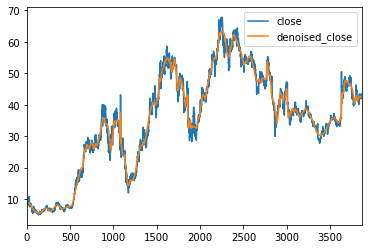

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df[df['StockNo'] == '9945'][['close', 'denoised_close']].plot()